In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_pack = pd.read_csv('CE290_battery_sim_data.csv', index_col=0)
df_pack

,voltage,current,capacity,SOC,power
0,368.634453,24.0,193.209322,0.901098,8847.226880
1,368.456103,24.0,192.809322,0.899233,8842.946477
2,368.353706,24.0,192.409322,0.897367,8840.488946
3,368.259974,24.0,192.009322,0.895502,8838.239371
4,368.168896,24.0,191.609322,0.893636,8836.053506
...,...,...,...,...,...
251015,259.287428,0.0,0.108104,0.000504,0.000000
251016,259.287428,0.0,0.108104,0.000504,0.000000
251017,259.287428,0.0,0.108104,0.000504,0.000000
251018,259.287428,0.0,0.108104,0.000504,0.000000


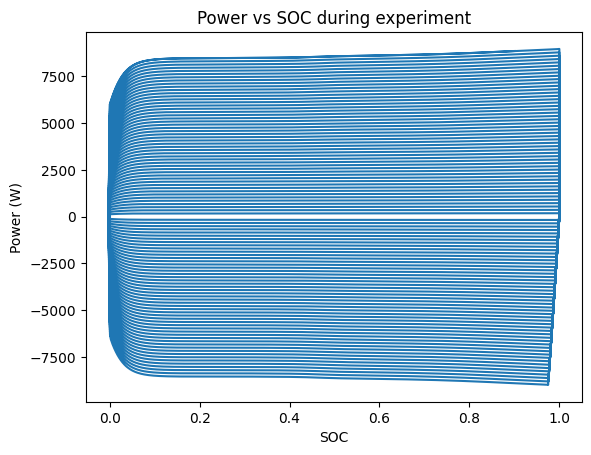

In [3]:
fig, ax = plt.subplots()
ax.plot(df_pack['SOC'], df_pack['power'])
ax.set_title("Power vs SOC during experiment")
ax.set_xlabel("SOC")
ax.set_ylabel("Power (W)")
plt.show()

In [4]:
# drop the first discharge session

df_pack_update = df_pack.drop(np.arange(df_pack.index[0], df_pack.index[df_pack['power'] < 0][0]))
df_pack_update

,voltage,current,capacity,SOC,power
516,259.348316,-0.48,8.171241e-14,3.810940e-16,-124.487192
517,259.576177,-0.48,8.000000e-03,3.731075e-05,-124.596565
518,259.707414,-0.48,1.600000e-02,7.462150e-05,-124.659559
519,259.827797,-0.48,2.400000e-02,1.119323e-04,-124.717343
520,259.944606,-0.48,3.200000e-02,1.492430e-04,-124.773411
...,...,...,...,...,...
251015,259.287428,0.00,1.081043e-01,5.041815e-04,0.000000
251016,259.287428,0.00,1.081043e-01,5.041815e-04,0.000000
251017,259.287428,0.00,1.081043e-01,5.041815e-04,0.000000
251018,259.287428,0.00,1.081043e-01,5.041815e-04,0.000000


## Discharge
#### Prepare dataset

In [5]:
# df with only positive power

df_dis_charge_orig = df_pack_update[df_pack_update['power'] > 0].drop(columns=['capacity', 'power'])
df_dis_charge = df_dis_charge_orig.drop(df_dis_charge_orig.index[df_dis_charge_orig['SOC'] < 0])
df_dis_charge

,voltage,current,SOC
27426,374.377025,0.48,0.999979
27427,374.371535,0.48,0.999942
27428,374.368579,0.48,0.999904
27429,374.365948,0.48,0.999867
27430,374.363447,0.48,0.999830
...,...,...,...
250984,267.018272,24.00,0.006147
250985,261.526960,24.00,0.004281
250986,255.771870,24.00,0.002416
250987,249.753250,24.00,0.000550


In [6]:
df_dis_charge.to_csv('CE290_battery_sim_discharge.csv') 

#### Visualize the dataset

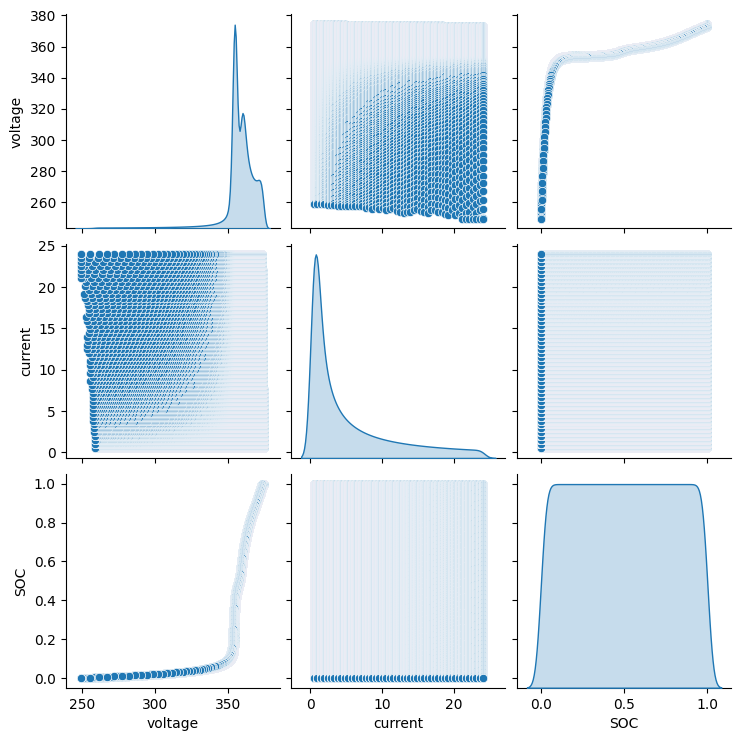

In [7]:
import seaborn as sns

sns.pairplot(df_dis_charge,diag_kind='kde')

In [8]:
# prepare for the second trial
df_dis_charge['SS'] = df_dis_charge['SOC'] * df_dis_charge['SOC']
df_dis_charge['Si'] = df_dis_charge['SOC'] * df_dis_charge['current']
df_dis_charge['ii'] = df_dis_charge['current'] * df_dis_charge['current']

df_dis_charge['SSS'] = df_dis_charge['SOC'] * df_dis_charge['SOC'] * df_dis_charge['SOC']
df_dis_charge['SSi'] = df_dis_charge['SOC'] * df_dis_charge['SOC'] * df_dis_charge['current']
df_dis_charge['Sii'] = df_dis_charge['SOC'] * df_dis_charge['current'] * df_dis_charge['current']
df_dis_charge['iii'] = df_dis_charge['current'] * df_dis_charge['current'] * df_dis_charge['current']

df_dis_charge['log_SOC'] = np.log(df_dis_charge['SOC'])

#### Normalize the discharge dataframe

In [9]:
df_dis_charge.min()

voltage    2.496010e+02
current    4.800000e-01
SOC        7.813997e-06
SS         6.105856e-11
Si         6.459935e-06
ii         2.304000e-01
SSS        4.771114e-16
SSi        8.693908e-11
Sii        3.100769e-06
iii        1.105920e-01
log_SOC   -1.175959e+01
dtype: float64

In [10]:
df_dis_charge.max()

voltage      374.377025
current       24.000000
SOC            1.000479
SS             1.000957
Si            24.011484
ii           576.000000
SSS            1.001436
SSi           24.022974
Sii          576.275620
iii        13824.000000
log_SOC        0.000478
dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_discharge_n = pd.DataFrame(scaler.fit_transform(df_dis_charge), columns=df_dis_charge.columns)
df_discharge_n

,voltage,current,SOC,SS,Si,ii,SSS,SSi,Sii,iii,log_SOC
0,1.000000e+00,0.0,0.999501,9.990016e-01,0.019990,0.0,9.985027e-01,1.998003e-02,0.000400,0.0,0.999958
1,9.999560e-01,0.0,0.999463,9.989270e-01,0.019989,0.0,9.983910e-01,1.997854e-02,0.000400,0.0,0.999954
2,9.999323e-01,0.0,0.999426,9.988525e-01,0.019988,0.0,9.982792e-01,1.997705e-02,0.000400,0.0,0.999951
3,9.999112e-01,0.0,0.999389,9.987779e-01,0.019988,0.0,9.981674e-01,1.997556e-02,0.000400,0.0,0.999948
4,9.998912e-01,0.0,0.999351,9.987034e-01,0.019987,0.0,9.980557e-01,1.997407e-02,0.000400,0.0,0.999945
...,...,...,...,...,...,...,...,...,...,...,...
120620,1.395886e-01,1.0,0.006136,3.774899e-05,0.006144,1.0,2.319311e-07,3.774905e-05,0.006144,1.0,0.566986
120621,9.557922e-02,1.0,0.004272,1.831303e-05,0.004279,1.0,7.836870e-08,1.831309e-05,0.004279,1.0,0.536232
120622,4.945587e-02,1.0,0.002407,5.830884e-06,0.002414,1.0,1.408019e-08,5.830941e-06,0.002415,1.0,0.487574
120623,1.220500e-03,1.0,0.000542,3.025375e-07,0.000550,1.0,1.664558e-10,3.025949e-07,0.000550,1.0,0.361787


#### Split train and test dataset

In [12]:
from sklearn.model_selection import train_test_split

train_dis_charge, test_dis_charge = train_test_split(df_discharge_n, test_size=0.3, random_state=50)

#### Training and Testing model for discharging - 1

In [13]:
# linear regression

import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, max_error, mean_absolute_error

x_train_dis_charge = train_dis_charge[['current', 'SOC']]
y_train_dis_charge = train_dis_charge['voltage']
x_test_dis_charge = test_dis_charge[['current', 'SOC']]
y_test_dis_charge = test_dis_charge['voltage']

linear_regression_formula = ("voltage ~ current + SOC")

dis_charge_linear_model = smf.ols(formula=linear_regression_formula, data=train_dis_charge).fit()
# dis_charge_linear_model.rsquared
# dis_charge_linear_model.summary()

y_predict_dis_charge_1 = dis_charge_linear_model.predict(x_test_dis_charge)

linear_model_mse = mean_squared_error(y_test_dis_charge, y_predict_dis_charge_1)
linear_model_mse

0.005864076423605227

#### Training and Testing model for discharging - 2

In [14]:
# linear regression with non-linear terms

x_train_dis_charge = train_dis_charge[['current', 'SOC', 'SS', 'Si', 'ii', 'SSS', 'SSi', 'Sii', 'iii', 'log_SOC']]
y_train_dis_charge = train_dis_charge['voltage']
x_test_dis_charge = test_dis_charge[['current', 'SOC', 'SS', 'Si', 'ii', 'SSS', 'SSi', 'Sii', 'iii', 'log_SOC']]
y_test_dis_charge = test_dis_charge['voltage']

# linear_regression_formula = ("voltage ~ current + SOC + SS + Si + ii + SSS + SSi + Sii + iii + log_SOC")
linear_regression_formula = ("voltage ~ current + SOC + SS + Si + SSS + SSi + log_SOC + 0")

dis_charge_linear_model = smf.ols(formula=linear_regression_formula, data=train_dis_charge).fit()
# dis_charge_linear_model.rsquared
# dis_charge_linear_model.summary()

y_predict_dis_charge_2 = dis_charge_linear_model.predict(x_test_dis_charge)

linear_model_mse = mean_squared_error(y_test_dis_charge, y_predict_dis_charge_2)
linear_model_mse

0.0018630510519090945

In [15]:
mean_absolute_error(y_test_dis_charge, y_predict_dis_charge_2)

0.023778149777551476

In [16]:
max_error(y_test_dis_charge, y_predict_dis_charge_2)

0.31035985803482025

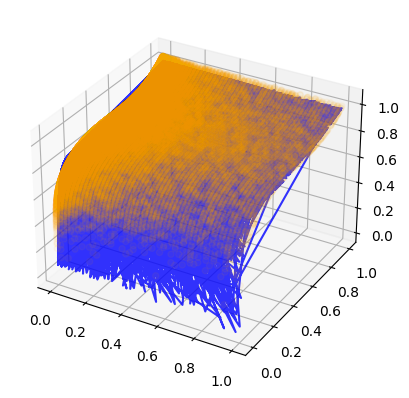

In [17]:
from mpl_toolkits.mplot3d import axes3d

ax = plt.figure().add_subplot(projection='3d')
ax.plot(test_dis_charge['current'], test_dis_charge['SOC'], y_test_dis_charge, label='true voltage', alpha=0.8, color = 'blue')
ax.scatter(test_dis_charge['current'], test_dis_charge['SOC'], y_predict_dis_charge_2, label='predict voltage', alpha=0.05, color = 'orange')

In [18]:
dis_charge_linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                voltage   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          4.814e+06
Date:                Sat, 29 Apr 2023   Prob (F-statistic):                        0.00
Time:                        14:21:01   Log-Likelihood:                      1.4526e+05
No. Observations:               84437   AIC:                                 -2.905e+05
Df Residuals:                   84430   BIC:                                 -2.904e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
current       -0.0722      0.002    -41.938      0.000      -0.076      -0.069
SOC            0.6192      0.007     93.898      0.000       0.606       0.632
SS            -1.6451      0.014   -121.736      0.000      -1.672      -1.619
Si             0.2412      0.008     29.757      0.000       0.225       0.257
SSS            1.1792      0.008    138.894      0.000       1.163       1.196
SSi           -0.1964      0.008    -25.028      0.000      -0.212      -0.181
log_SOC        0.8818      0.001    852.763      0.000       0.880       0.884
==============================================================================
Omnibus:                    62088.843   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1488687.380
Skew:                          -3.321   Prob(JB):                         0.00
Kurtosis:                      22.468   Cond. No.                         140.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### FNN for discharging - 3

In [19]:
df_dis_charge_orig

,voltage,current,SOC
27426,374.377025,0.48,0.999979
27427,374.371535,0.48,0.999942
27428,374.368579,0.48,0.999904
27429,374.365948,0.48,0.999867
27430,374.363447,0.48,0.999830
...,...,...,...
250984,267.018272,24.00,0.006147
250985,261.526960,24.00,0.004281
250986,255.771870,24.00,0.002416
250987,249.753250,24.00,0.000550


In [20]:
len(df_dis_charge[df_dis_charge['current'] == 23.99999999978])

538

In [21]:
# take 501 points of voltage for each current by interpolating 100% SOC evenly

from scipy.interpolate import interp1d

current_array = np.array([])
voltage_array = np.array([])

for i in df_dis_charge_orig['current'].unique():
    f_v = interp1d(df_dis_charge_orig[df_dis_charge_orig['current'] == i]['SOC'], df_dis_charge_orig[df_dis_charge_orig['current'] == i]['voltage'])
    SOC_new = np.linspace(0.001, 0.999, 501)
    v_new = f_v(SOC_new)
    
    voltage_array = np

In [22]:
# np.append(np.append(np.array([[]]), a_new.reshape(len(a_new),1), axis=1), a_new)

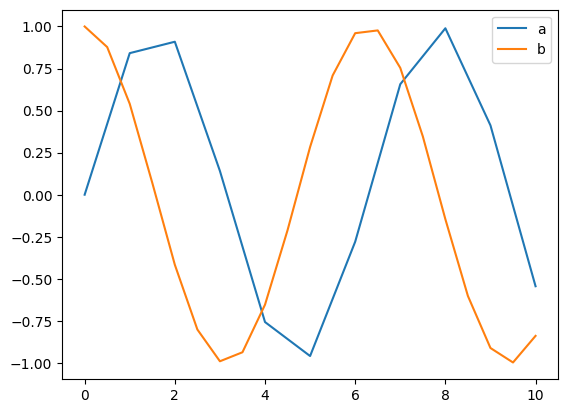

In [23]:
from scipy.interpolate import interp1d

# Create two 2-dimensional arrays with different x-axis frequencies
x1 = np.linspace(0, 10, 11)
y1 = np.sin(x1)
a = np.vstack((x1, y1)).T

x2 = np.linspace(0, 10, 21)
y2 = np.cos(x2)
b = np.vstack((x2, y2)).T

# Create interpolation functions for both arrays
f_a = interp1d(a[:,0], a[:,1])
f_b = interp1d(b[:,0], b[:,1])

# Interpolate both arrays to the same set of x-axis frequencies
x_new = np.linspace(0, 10, 101)
a_new = f_a(x_new)
b_new = f_b(x_new)

# Plot the interpolated arrays
import matplotlib.pyplot as plt

plt.plot(x_new, a_new, label='a')
plt.plot(x_new, b_new, label='b')
plt.legend()
plt.show()


## Charge
#### Prepare dataset

In [24]:
# df with only negative power

df_charge_orig = df_pack_update[df_pack_update['power'] < 0].drop(columns=['capacity', 'power'])

df_charge = df_charge_orig.copy()
df_charge['current'] = - df_charge_orig['current']

df_charge = df_charge.drop(df_charge.index[df_charge['SOC'] < 0])

df_charge

,voltage,current,SOC
516,259.348316,0.480000,3.810940e-16
517,259.576177,0.480000,3.731075e-05
518,259.707414,0.480000,7.462150e-05
519,259.827797,0.480000,1.119323e-04
520,259.944606,0.480000,1.492430e-04
...,...,...,...
250415,374.400000,0.000652,1.000478e+00
250416,374.400000,0.000597,1.000478e+00
250417,374.400000,0.000547,1.000478e+00
250418,374.400000,0.000501,1.000478e+00


In [25]:
df_charge.to_csv('CE290_battery_sim_charge.csv') 

In [26]:
# fig, ax = plt.subplots()
# ax.plot(df_charge['SOC'], df_charge['voltage'], label='voltage')
# ax.plot(df_charge['SOC'], df_charge['current'], label='current')
# ax.plot(df_charge['SOC'], df_charge['capacity'], label='capacity')
# ax.plot(df_charge['SOC'], df_charge['power'], label='power')
# ax.set_xlabel("SOC")
# ax.legend()
# plt.show()

#### Visualize the dataframe

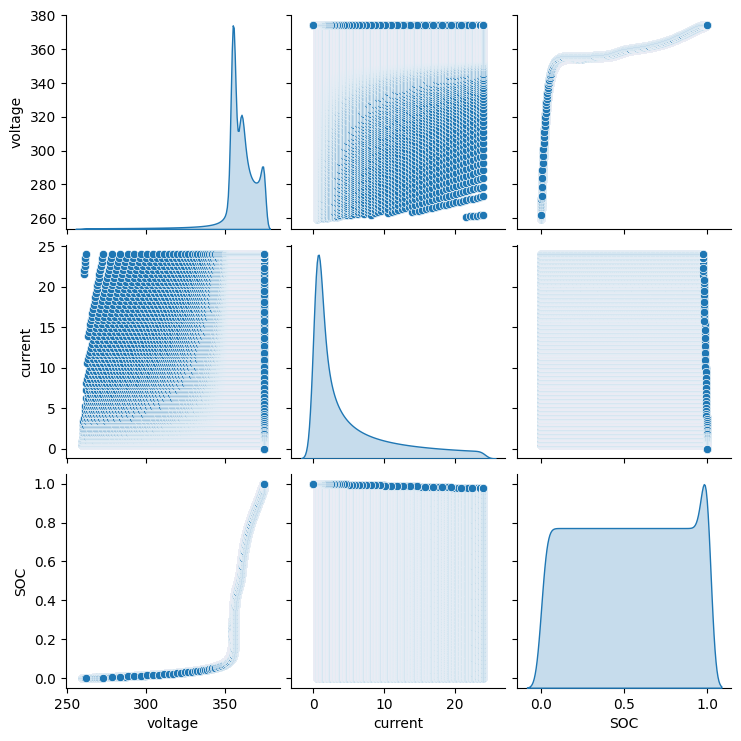

In [27]:
import seaborn as sns

sns.pairplot(df_charge,diag_kind='kde')

In [28]:
# prepare for the second trial
df_charge['SS'] = df_charge['SOC'] * df_charge['SOC']
df_charge['Si'] = df_charge['SOC'] * df_charge['current']
df_charge['ii'] = df_charge['current'] * df_charge['current']

df_charge['SSS'] = df_charge['SOC'] * df_charge['SOC'] * df_charge['SOC']
df_charge['SSi'] = df_charge['SOC'] * df_charge['SOC'] * df_charge['current']
df_charge['Sii'] = df_charge['SOC'] * df_charge['current'] * df_charge['current']
df_charge['iii'] = df_charge['current'] * df_charge['current'] * df_charge['current']

df_charge['log_SOC'] = np.log(df_charge['SOC'])

#### Normalize the dataset

In [29]:
df_charge.min()

voltage    2.593483e+02
current    4.591280e-04
SOC        3.810940e-16
SS         1.452326e-31
Si         1.829251e-16
ii         2.107985e-07
SSS        5.534727e-47
SSi        6.971165e-32
Sii        8.780405e-17
iii        9.678349e-11
log_SOC   -3.550349e+01
dtype: float64

In [30]:
df_charge.max()

voltage      374.400011
current       24.020522
SOC            1.000479
SS             1.000957
Si            23.431340
ii           576.985466
SSS            1.001436
SSi           22.856611
Sii          562.833021
iii        13859.491952
log_SOC        0.000478
dtype: float64

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_charge_n = pd.DataFrame(scaler.fit_transform(df_charge), columns=df_charge.columns)
df_charge_n

,voltage,current,SOC,SS,Si,ii,SSS,SSi,Sii,iii,log_SOC
0,0.000000,0.019964,0.000000,0.000000e+00,0.000000e+00,3.993165e-04,0.000000e+00,0.000000e+00,0.000000e+00,7.979513e-06,0.000000
1,0.001981,0.019964,0.000037,1.390761e-09,7.643251e-07,3.993165e-04,5.186552e-14,2.923462e-11,1.527344e-08,7.979513e-06,0.712801
2,0.003121,0.019964,0.000075,5.563044e-09,1.528650e-06,3.993165e-04,4.149241e-13,1.169385e-10,3.054688e-08,7.979513e-06,0.732324
3,0.004168,0.019964,0.000112,1.251685e-08,2.292975e-06,3.993165e-04,1.400369e-12,2.631116e-10,4.582032e-08,7.979513e-06,0.743744
4,0.005183,0.019964,0.000149,2.225217e-08,3.057300e-06,3.993165e-04,3.319393e-12,4.677539e-10,6.109377e-08,7.979513e-06,0.751847
...,...,...,...,...,...,...,...,...,...,...,...
126237,1.000000,0.000008,1.000000,9.999997e-01,2.783111e-05,3.709899e-10,9.999995e-01,2.854457e-05,7.552106e-10,1.299760e-14,1.000000
126238,1.000000,0.000006,1.000000,9.999998e-01,2.550729e-05,2.531594e-10,9.999996e-01,2.616118e-05,6.343596e-10,8.398841e-15,1.000000
126239,1.000000,0.000004,1.000000,9.999998e-01,2.335942e-05,1.533814e-10,9.999998e-01,2.395825e-05,5.320238e-10,4.831082e-15,1.000000
126240,1.000000,0.000002,1.000000,9.999999e-01,2.139165e-05,6.966878e-11,9.999999e-01,2.194004e-05,4.461651e-10,2.089870e-15,1.000000


#### Split train and test dataset

In [32]:
train_charge, test_charge = train_test_split(df_charge_n, test_size=0.3, random_state=50)

#### Training and Testing model for Charging - 1

In [33]:
# linear regression

x_train_charge = train_charge[['current', 'SOC']]
y_train_charge = train_charge['voltage']
x_test_charge = test_charge[['current', 'SOC']]
y_test_charge = test_charge['voltage']

linear_regression_formula = ("voltage ~ current + SOC")

charge_linear_model = smf.ols(formula=linear_regression_formula, data=train_charge).fit()
# charge_linear_model.rsquared
# charge_linear_model.summary()

y_predict_charge_1 = charge_linear_model.predict(x_test_charge)

linear_model_mse = mean_squared_error(y_test_charge, charge_linear_model.predict(x_test_charge))
linear_model_mse

0.006158469129201893

#### Training and Testing model for Charging - 2

In [34]:
# linear regression with non-linear terms

x_train_charge = train_charge[['current', 'SOC', 'SS', 'Si', 'ii', 'SSS', 'SSi', 'Sii', 'iii', 'log_SOC']]
y_train_charge = train_charge['voltage']
x_test_charge = test_charge[['current', 'SOC', 'SS', 'Si', 'ii', 'SSS', 'SSi', 'Sii', 'iii', 'log_SOC']]
y_test_charge = test_charge['voltage']

# linear_regression_formula = ("voltage ~ current + SOC + SS + Si + ii + SSS + SSi + Sii + iii + log_SOC")
linear_regression_formula = ("voltage ~ current + SOC + SS + Si + SSS + SSi + log_SOC+ 0")

charge_linear_model = smf.ols(formula=linear_regression_formula, data=train_charge).fit()
# charge_linear_model.rsquared
# charge_linear_model.summary()

y_predict_charge_2 = charge_linear_model.predict(x_test_charge)

linear_model_mse = mean_squared_error(y_test_charge, y_predict_charge_2)
linear_model_mse

0.00334696906210344

In [35]:
mean_absolute_error(y_test_charge, y_predict_charge_2)

0.03307514097129955

In [36]:
max_error(y_test_charge, y_predict_charge_2)

0.48361832282042316

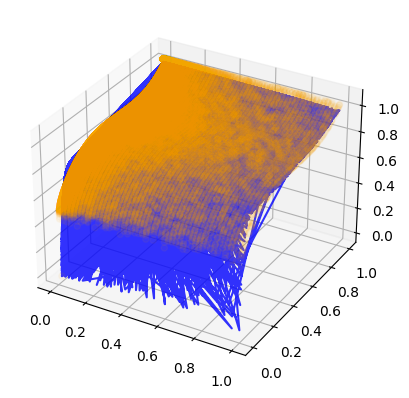

In [37]:
from mpl_toolkits.mplot3d import axes3d

ax = plt.figure().add_subplot(projection='3d')
ax.plot(test_charge['current'], test_charge['SOC'], y_test_charge, label='true voltage', alpha=0.8, color = 'blue')
ax.scatter(test_charge['current'], test_charge['SOC'], y_predict_charge_2, label='predict voltage', alpha=0.05, color = 'orange')

In [38]:
charge_linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                voltage   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          2.845e+06
Date:                Sat, 29 Apr 2023   Prob (F-statistic):                        0.00
Time:                        14:21:11   Log-Likelihood:                      1.2671e+05
No. Observations:               88369   AIC:                                 -2.534e+05
Df Residuals:                   88362   BIC:                                 -2.533e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
current        0.0285      0.002     12.120      0.000       0.024       0.033
SOC            1.6482      0.008    217.491      0.000       1.633       1.663
SS            -3.1194      0.016   -195.483      0.000      -3.151      -3.088
Si            -0.1080      0.011    -10.278      0.000      -0.129      -0.087
SSS            1.8857      0.010    191.326      0.000       1.866       1.905
SSi            0.1246      0.010     12.664      0.000       0.105       0.144
log_SOC        0.6107      0.001    573.198      0.000       0.609       0.613
==============================================================================
Omnibus:                    66623.982   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1951303.471
Skew:                          -3.368   Prob(JB):                         0.00
Kurtosis:                      25.013   Cond. No.                         135.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""